### Pandas Groupby Dataframe - .groupby()

In [1]:
import pandas as pd
# US_congress = pd.read_csv("https://theunitedstates.io/congress-legislators/legislators-historical.csv")
air_quality = pd.read_csv("https://raw.githubusercontent.com/vincentarelbundock/Rdatasets/master/csv/datasets/airquality.csv", usecols=range(1,7))
air_quality

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.0,190.0,7.4,67,5,1
1,36.0,118.0,8.0,72,5,2
2,12.0,149.0,12.6,74,5,3
3,18.0,313.0,11.5,62,5,4
4,NaN,NaN,14.3,56,5,5
...,...,...,...,...,...,...
148,30.0,193.0,6.9,70,9,26
149,NaN,145.0,13.2,77,9,27
150,14.0,191.0,14.3,75,9,28
151,18.0,131.0,8.0,76,9,29


In [2]:
air_quality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ozone    116 non-null    float64
 1   Solar.R  146 non-null    float64
 2   Wind     153 non-null    float64
 3   Temp     153 non-null    int64  
 4   Month    153 non-null    int64  
 5   Day      153 non-null    int64  
dtypes: float64(3), int64(3)
memory usage: 7.3 KB


In [3]:
air_quality.head()

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.0,190.0,7.4,67,5,1
1,36.0,118.0,8.0,72,5,2
2,12.0,149.0,12.6,74,5,3
3,18.0,313.0,11.5,62,5,4
4,NaN,NaN,14.3,56,5,5


### .groupby() is split-apply-combine. This refers to a chain of three steps:

#### 1. Split a table into groups.
#### 2. Apply some operations to each of those smaller tables.
#### 3. Combine the results i.e. Aggregate

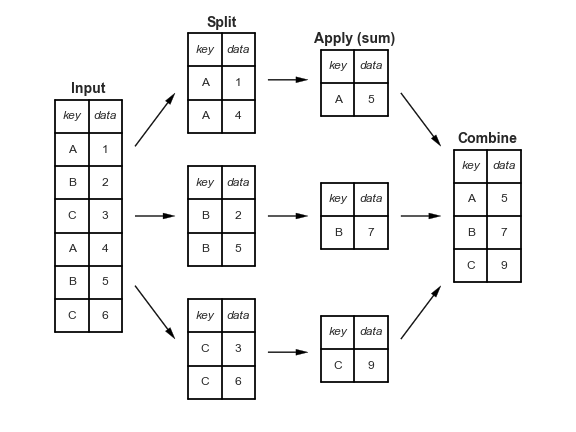

#### Groupby on a single column

In [4]:
air_quality.groupby('Month').agg(avg_temp= ("Temp","mean"))

,avg_temp
Month,
5,65.548387
6,79.100000
7,83.903226
8,83.967742
9,76.900000


#### Groupby on multiple columns

In [5]:
air_quality.groupby(['Month','Day',]).agg(avg_temp=("Temp", "mean"))

avg_temp
Month Day          
5     1          67
      2          72
      3          74
      4          62
      5          56
...             ...
9     26         70
      27         77
      28         75
      29         76
      30         68

[153 rows x 1 columns]

In [6]:
air_quality.groupby(['Month','Day',]).agg(avg_temp=("Temp", "mean")).head(30)

avg_temp
Month Day          
5     1          67
      2          72
      3          74
      4          62
      5          56
      6          66
      7          65
      8          59
      9          61
      10         69
      11         74
      12         69
      13         66
      14         68
      15         58
      16         64
      17         66
      18         57
      19         68
      20         62
      21         59
      22         73
      23         61
      24         61
      25         57
      26         58
      27         57
      28         67
      29         81
      30         79

#### Groupby and aggregate on multiple columns

In [7]:
air_quality.groupby(['Month','Day',]).agg(avg_temp=("Temp", "mean"), max_wind=("Wind", "max"))

avg_temp  max_wind
Month Day                    
5     1          67       7.4
      2          72       8.0
      3          74      12.6
      4          62      11.5
      5          56      14.3
...             ...       ...
9     26         70       6.9
      27         77      13.2
      28         75      14.3
      29         76       8.0
      30         68      11.5

[153 rows x 2 columns]

#### Above result is not correct as groupby is performed for each day of a month. So max value will not produce the desired result. Instead we get the actual value for wind for each day.

#### Correct way of doing this is as below

In [8]:
air_quality.groupby(['Month']).agg(avg_temp=("Temp", "mean"), max_wind=("Wind", "max"))

,avg_temp,max_wind
Month,,
5,65.548387,20.1
6,79.100000,20.7
7,83.903226,14.9
8,83.967742,15.5
9,76.900000,16.6


#### Grouping and sorting the values

In [9]:
air_quality.groupby(['Month']).agg(avg_temp=("Temp", "mean"), 
                                   max_wind=("Wind", "max")).sort_values(by="max_wind", ascending=False)

,avg_temp,max_wind
Month,,
6,79.100000,20.7
5,65.548387,20.1
9,76.900000,16.6
8,83.967742,15.5
7,83.903226,14.9


### Dropna from a dataframe

#### **Syntax**: 
#### dataframe.dropna(axis, how, thresh, subset, inplace)


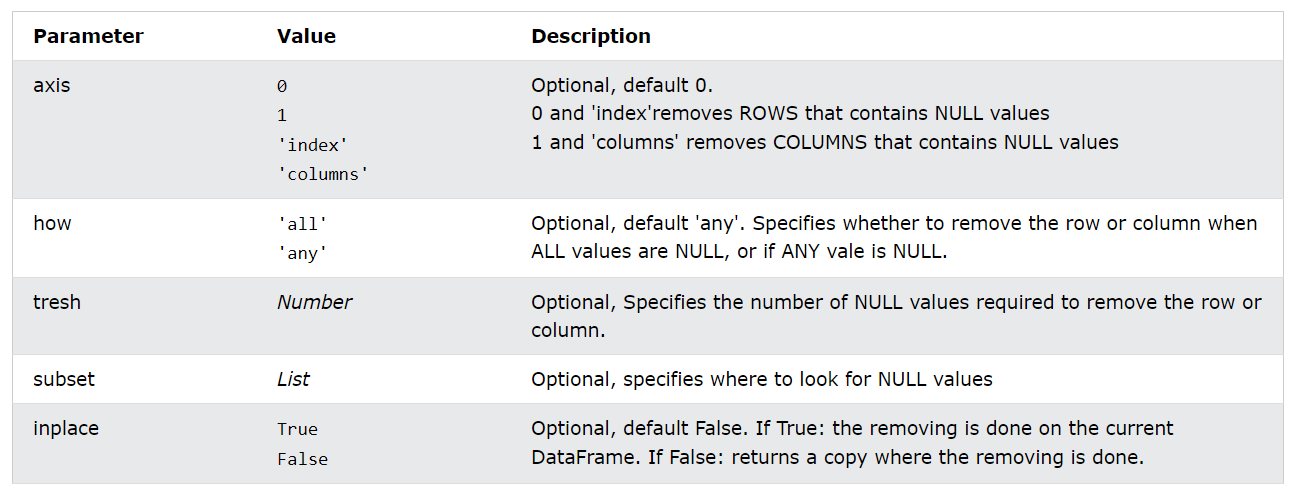

In [10]:
import numpy as np
import pandas as pd
df = pd.DataFrame({"name": ['Superman', 'Batman', 'Spiderman'],
                   "toy": [np.nan, 'Batmobile', 'Spiderman toy'],
                   "born": [np.nan, pd.Timestamp("1956-06-26"),np.nan]})
df

,name,toy,born
0,Superman,NaN,NaT
1,Batman,Batmobile,1956-06-26
2,Spiderman,Spiderman toy,NaT


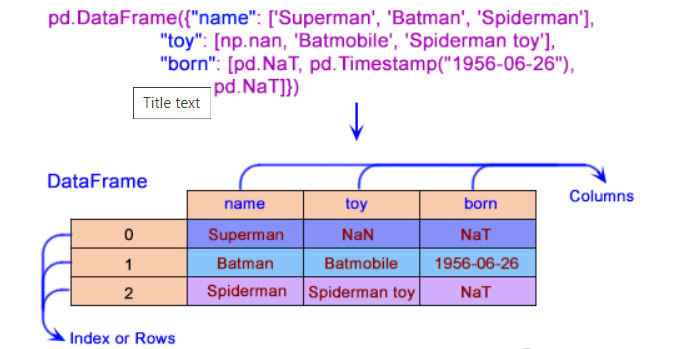

In [11]:
df.dropna()

,name,toy,born
1,Batman,Batmobile,1956-06-26


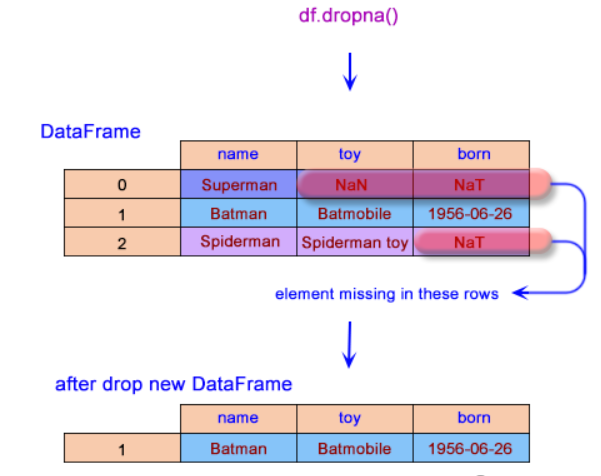

Drop the columns where at least one element is missing:



In [12]:
df.dropna(axis='columns')

,name
0,Superman
1,Batman
2,Spiderman


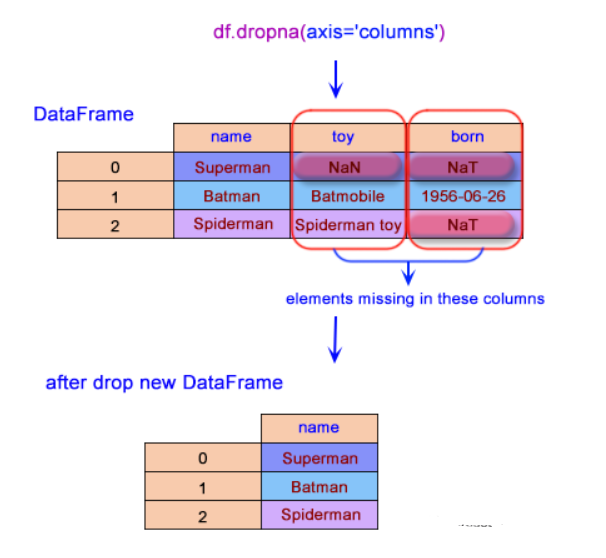

Drop the rows where all elements are missing.

In [13]:
df.dropna(how='all')

,name,toy,born
0,Superman,NaN,NaT
1,Batman,Batmobile,1956-06-26
2,Spiderman,Spiderman toy,NaT


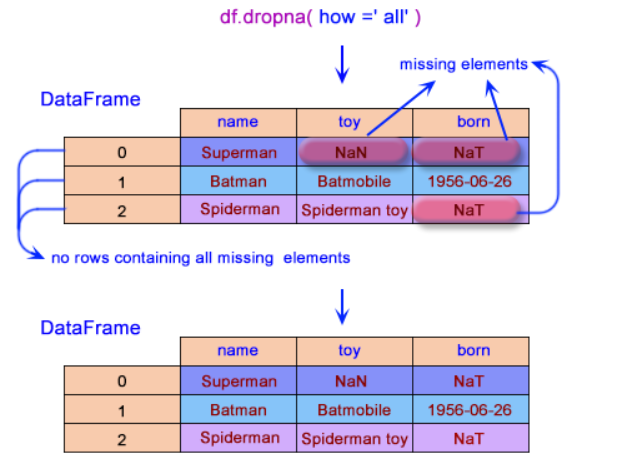

Keep only the rows with at least 2 non-NA values

In [14]:
df.dropna(thresh=3)

,name,toy,born
1,Batman,Batmobile,1956-06-26


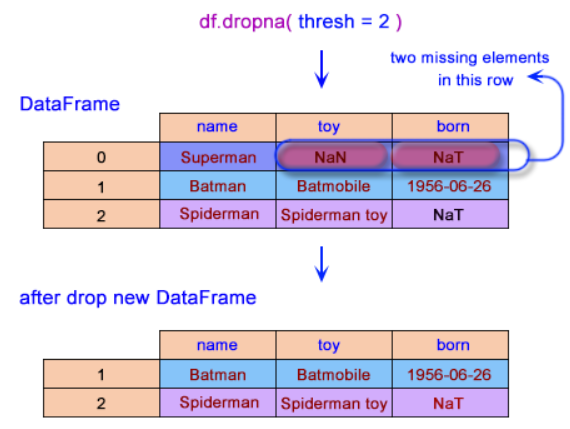

Define in which columns to look for missing values

In [15]:
df.dropna(subset=['name', 'born'],inplace=True)

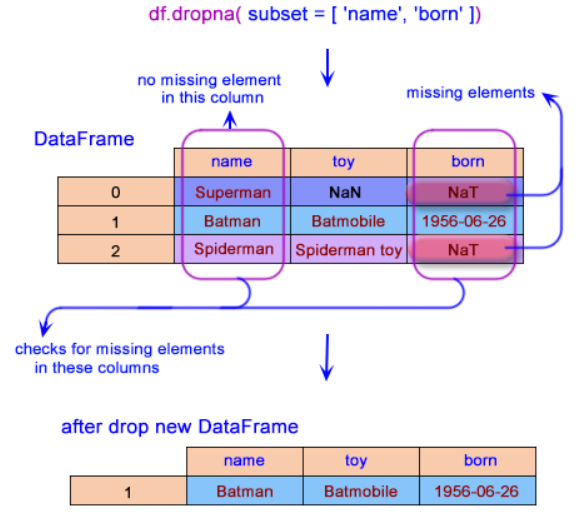

In [16]:
df

,name,toy,born
1,Batman,Batmobile,1956-06-26


Keep the DataFrame with valid entries in the same variable:

In [17]:
df.dropna(inplace=True)
df

,name,toy,born
1,Batman,Batmobile,1956-06-26


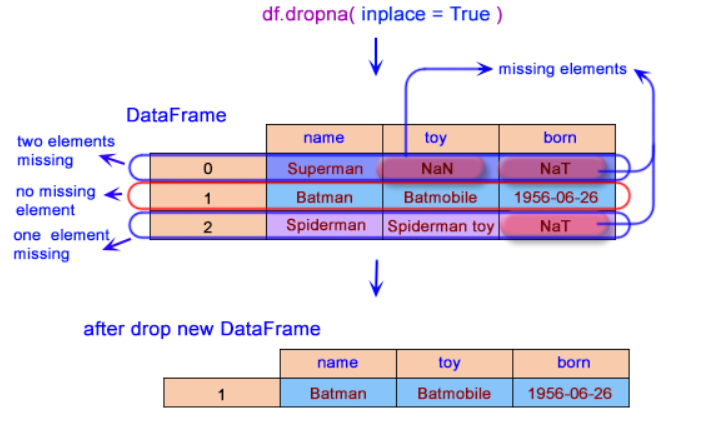

In [18]:
df

,name,toy,born
1,Batman,Batmobile,1956-06-26


In [19]:
df.replace(np.nan,0)

,name,toy,born
1,Batman,Batmobile,1956-06-26


In [20]:
df.replace(np.nan,df.name.max())

,name,toy,born
1,Batman,Batmobile,1956-06-26


In [21]:
df.fillna(df.name.max())

,name,toy,born
1,Batman,Batmobile,1956-06-26
